# Data Preprocessing

##Importing Libraries and dataset

In [ ]:
#RESULTS--> Very poor performance

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the dataset
dataset = pd.read_csv('glucose_hba1c.csv')

## EDA - Exploratory Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.1+ MB


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [ ]:
print("Dimensions of the dataset:", dataset.shape)

Dimensions of the dataset: (100000, 8)


In [ ]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000


In [ ]:
#finding missing values
missing_values = dataset.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [ ]:
# Print the minimum and maximum of the target variable of glucose level
print("Minimum:", y.min())
print("Maximum:", y.max())

Minimum: 80
Maximum: 300


In [ ]:
# Get unique values in the 'smoking_history' column
unique_values = dataset['smoking_history'].unique()

#Print the number of unique values
print("Number of unique words in 'smoking_history':", len(unique_values))


Number of unique words in 'smoking_history': 6


In [ ]:
#Count the frequency of each unique value in the 'smoking_history' column
value_counts = dataset['smoking_history'].value_counts().reset_index()
value_counts

,smoking_history,count
0,No Info,35816
1,never,35095
2,former,9352
3,current,9286
4,not current,6447
5,ever,4004


In [ ]:
gender_counts = dataset['gender'].value_counts().reset_index()
gender_counts

,gender,count
0,Female,58553
1,Male,41430
2,Other,17


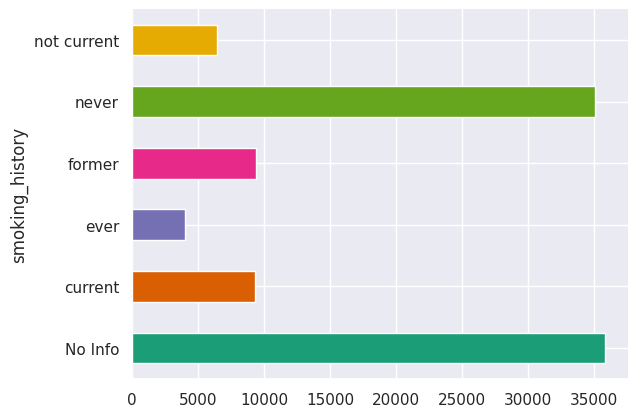

In [ ]:
# @title smoking_history

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('smoking_history').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

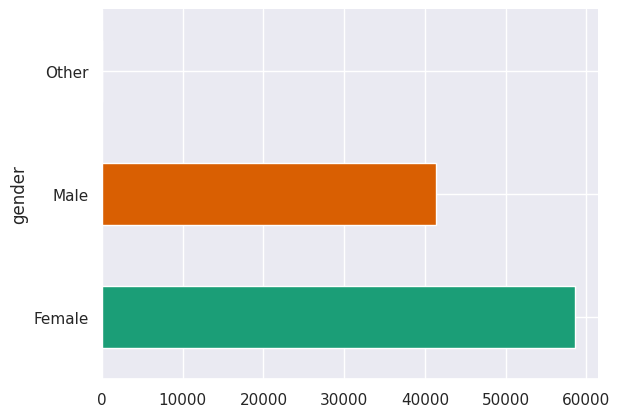

In [ ]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

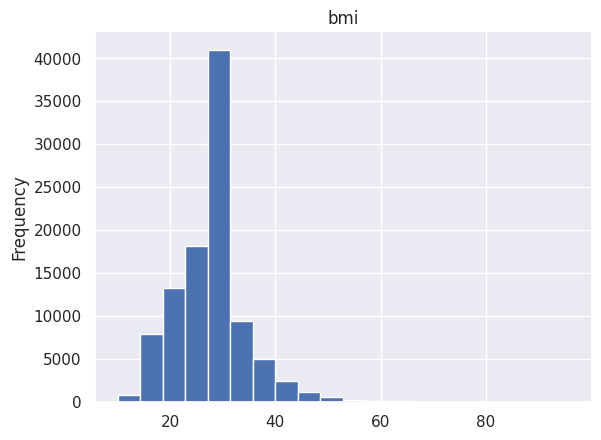

In [ ]:
# @title bmi

from matplotlib import pyplot as plt
dataset['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

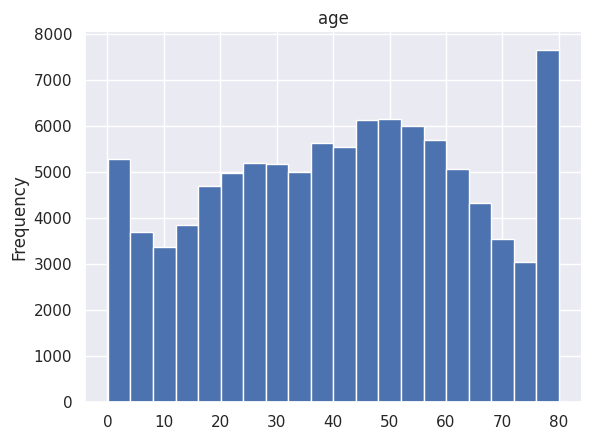

In [ ]:
# @title age

from matplotlib import pyplot as plt
dataset['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

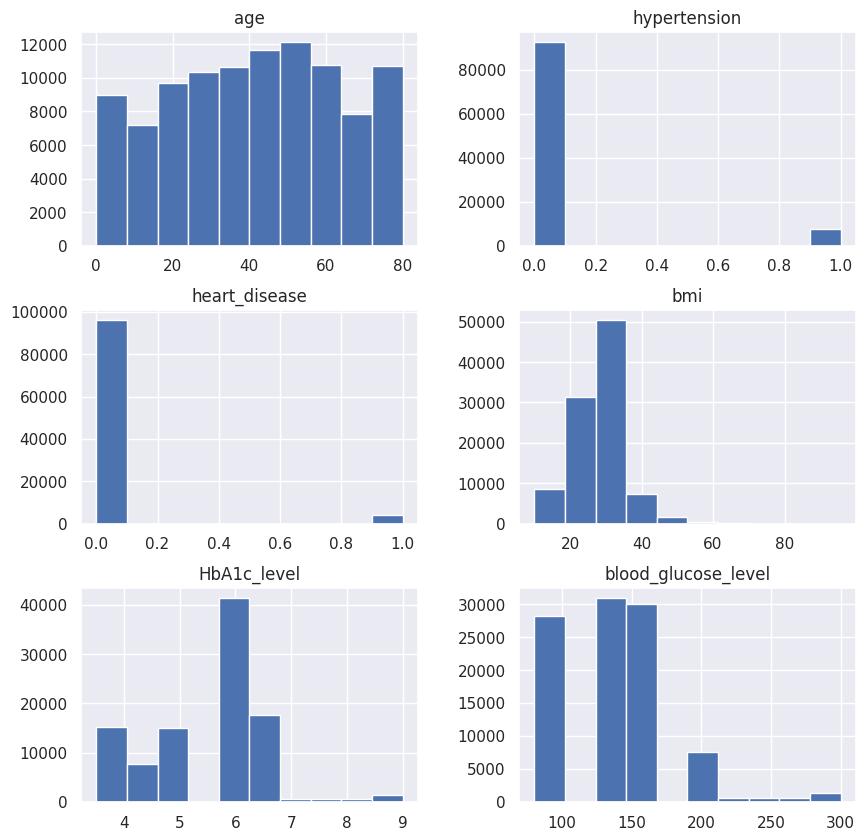

In [ ]:
dataset.hist(figsize=(10,10))
plt.show()

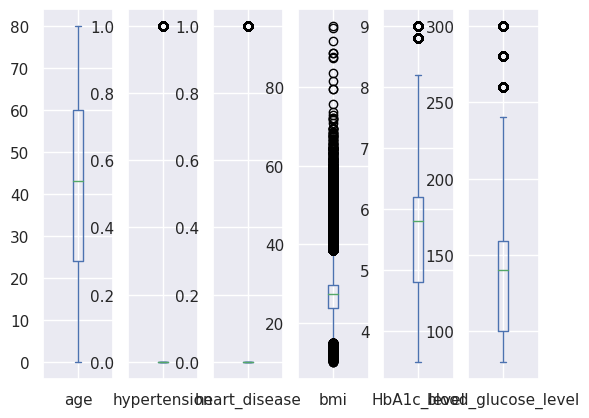

In [ ]:
dataset.plot(kind='box', subplots=True)
plt.show()

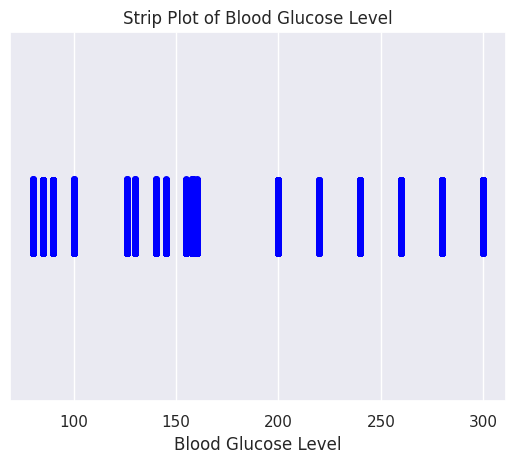

In [ ]:
sns.stripplot(x=dataset['blood_glucose_level'], color='blue')
plt.xlabel('Blood Glucose Level')
plt.title('Strip Plot of Blood Glucose Level')
plt.show()

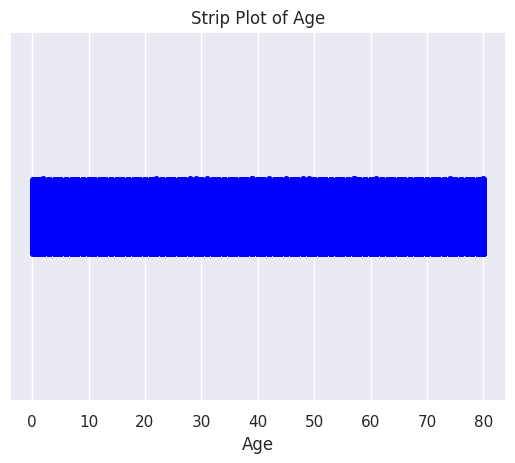

In [ ]:
sns.stripplot(x=dataset['age'], color='blue')
plt.xlabel('Age')
plt.title('Strip Plot of Age')
plt.show()

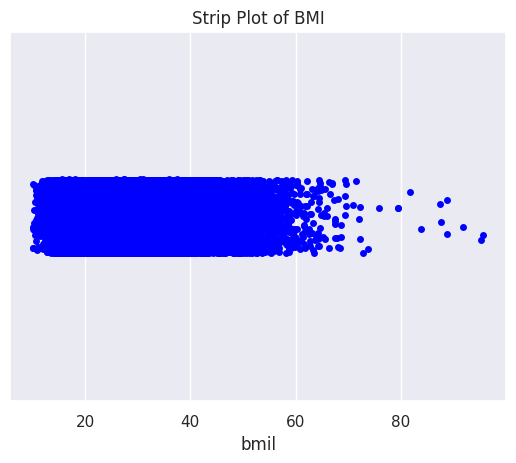

In [ ]:
sns.stripplot(x=dataset['bmi'], color='blue')
plt.xlabel('bmil')
plt.title('Strip Plot of BMI')
plt.show()

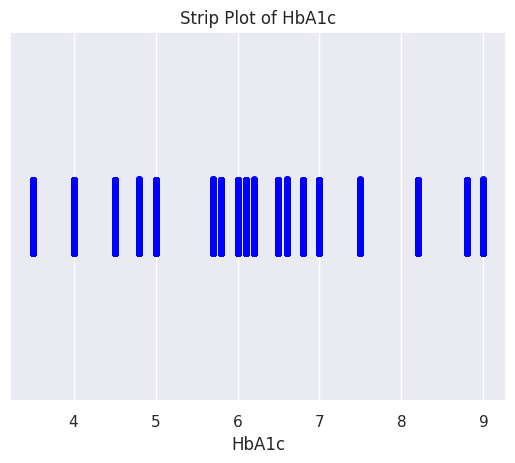

In [ ]:
sns.stripplot(x=dataset['HbA1c_level'], color='blue')
plt.xlabel('HbA1c')
plt.title('Strip Plot of HbA1c')
plt.show()

##Label Encoding

In [ ]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply the LabelEncoder to the 'gender' column
dataset['gender'] = le.fit_transform(dataset['gender'])  #0-Female  1-Male 2-Other

In [ ]:
le1 = LabelEncoder()

# Apply the LabelEncoder to the 'smoking_history' column
dataset['smoking_history'] = le1.fit_transform(dataset['gender'])

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[ 0.   80.    0.   ...  0.   25.19  6.6 ]
 [ 0.   54.    0.   ...  0.   27.32  6.6 ]
 [ 1.   28.    0.   ...  1.   27.32  5.7 ]
 ...
 [ 1.   66.    0.   ...  1.   27.83  5.7 ]
 [ 0.   24.    0.   ...  0.   35.42  4.  ]
 [ 0.   57.    0.   ...  0.   22.43  6.6 ]]


In [ ]:
print(y)

[140  80 158 ... 155 100  90]


<Axes: >

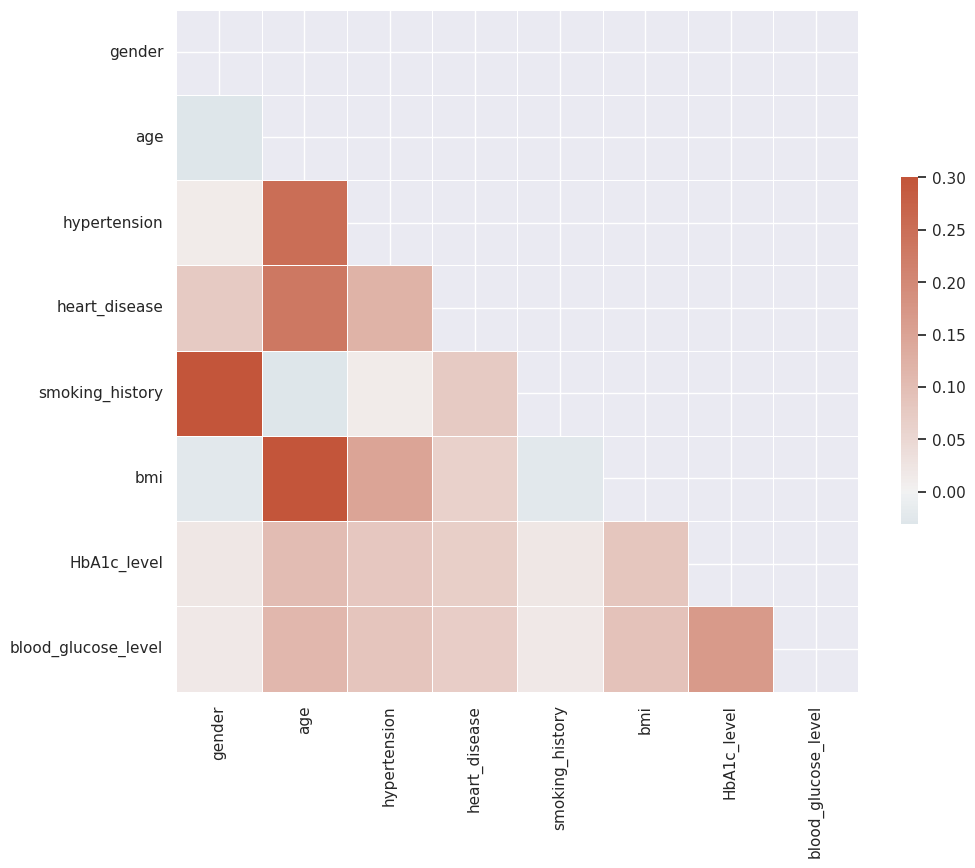

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



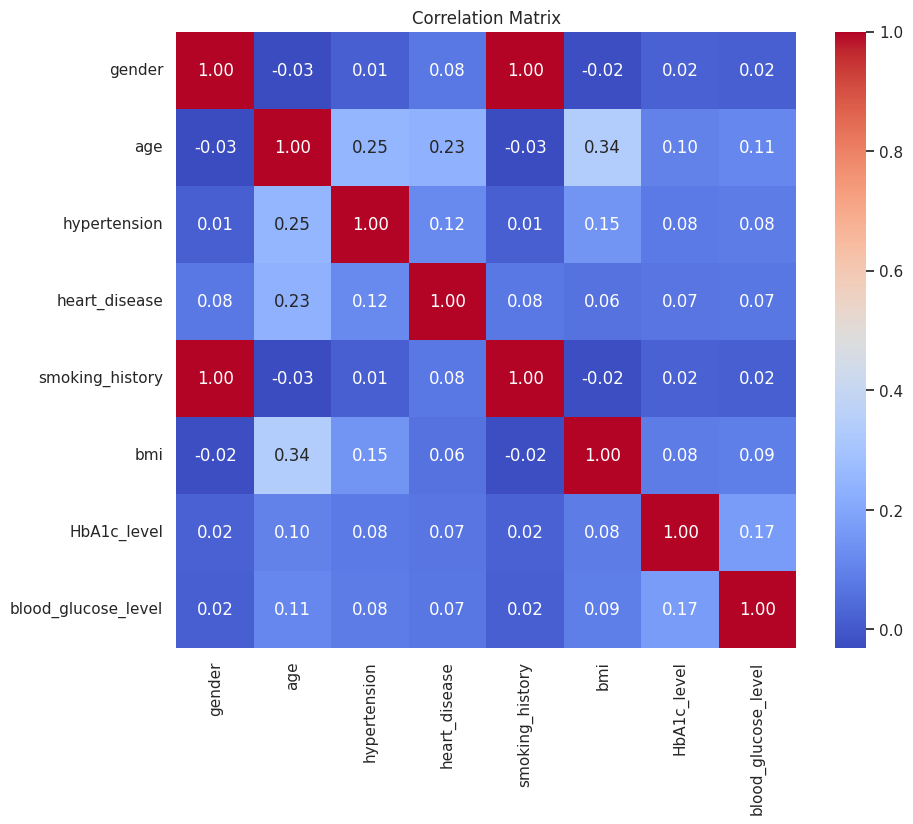

In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[ 0.   48.    0.   ...  0.   36.26  4.  ]
 [ 1.   50.    0.   ...  1.   30.68  5.8 ]
 [ 0.   63.    0.   ...  0.   38.19  3.5 ]
 ...
 [ 1.   80.    1.   ...  1.   28.36  5.8 ]
 [ 0.   51.    1.   ...  0.   57.51  6.2 ]
 [ 0.   79.    0.   ...  0.   27.32  6.  ]]


In [ ]:
print(X_test)

[[ 0.   73.    0.   ...  0.   26.62  5.  ]
 [ 0.   35.    0.   ...  0.   27.32  4.5 ]
 [ 1.   38.    0.   ...  1.   27.32  6.2 ]
 ...
 [ 0.   50.    1.   ...  0.   24.64  4.8 ]
 [ 1.   30.    0.   ...  1.   21.53  6.6 ]
 [ 0.   71.    0.   ...  0.   27.32  4.8 ]]


In [ ]:
print(y_train)

[130 155 200 ...  90 126  90]


In [ ]:
print(y_test)

[155 130 130 ... 145 158  85]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-8.41523244e-01  2.69837920e-01 -2.84670433e-01 ... -8.41523244e-01
   1.34380173e+00 -1.42570544e+00]
 [ 1.18685457e+00  3.58562299e-01 -2.84670433e-01 ...  1.18685457e+00
   5.04431277e-01  2.54747299e-01]
 [-8.41523244e-01  9.35270764e-01 -2.84670433e-01 ... -8.41523244e-01
   1.63412162e+00 -1.89249787e+00]
 ...
 [ 1.18685457e+00  1.68942799e+00  3.51283409e+00 ...  1.18685457e+00
   1.55445711e-01  2.54747299e-01]
 [-8.41523244e-01  4.02924489e-01  3.51283409e+00 ... -8.41523244e-01
   4.54032900e+00  6.28181241e-01]
 [-8.41523244e-01  1.64506580e+00 -2.84670433e-01 ... -8.41523244e-01
  -9.96094308e-04  4.41464270e-01]]


In [ ]:
print(X_test)

[[-8.41523244e-01  1.37889266e+00 -2.84670433e-01 ... -8.41523244e-01
  -1.06293463e-01 -4.92120584e-01]
 [-8.41523244e-01 -3.06870544e-01 -2.84670433e-01 ... -8.41523244e-01
  -9.96094308e-04 -9.58913012e-01]
 [ 1.18685457e+00 -1.73783976e-01 -2.84670433e-01 ...  1.18685457e+00
  -9.96094308e-04  6.28181241e-01]
 ...
 [-8.41523244e-01  3.58562299e-01  3.51283409e+00 ... -8.41523244e-01
  -4.04134593e-01 -6.78837555e-01]
 [ 1.18685457e+00 -5.28681492e-01 -2.84670433e-01 ...  1.18685457e+00
  -8.71955761e-01  1.00161518e+00]
 [-8.41523244e-01  1.29016828e+00 -2.84670433e-01 ... -8.41523244e-01
  -9.96094308e-04 -6.78837555e-01]]


#MODELS

In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,30.986000,1539.486000,0.070000
Linear Regression,30.734000,1582.486000,0.044000
Support Vector Machines,30.233000,1595.874000,0.036000
Random Forest,32.830000,1723.663000,-0.042000
Decision Tree,40.442000,2834.114000,-0.713000
K-nearest Neighbors,41.919000,2998.590000,-0.812000


##Deploying models individually

In [ ]:
#MLR
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

[[136.37 155.  ]
 [130.03 130.  ]
 [141.13 130.  ]
 ...
 [139.73 145.  ]
 [140.75 158.  ]
 [135.27  85.  ]]


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-7.76e+11  2.22e+00  1.94e+00  1.57e+00  7.76e+11  2.13e+00  6.05e+00]
137.8899374999946


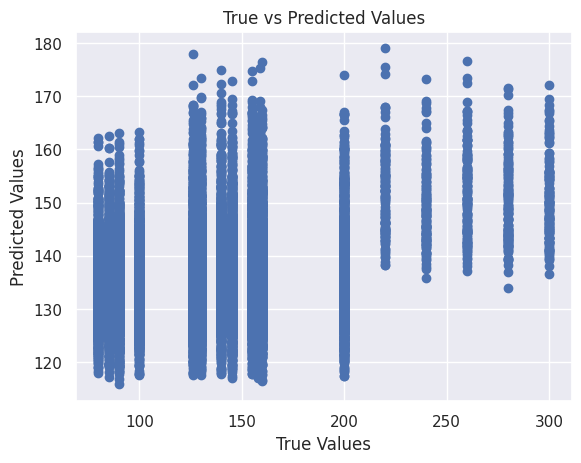

In [ ]:
import matplotlib.pyplot as plt

# Assume y_true is your true target values and y_pred is your predicted target values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


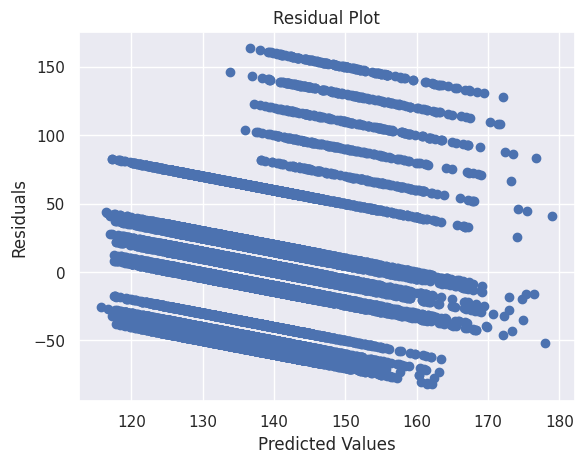

In [ ]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


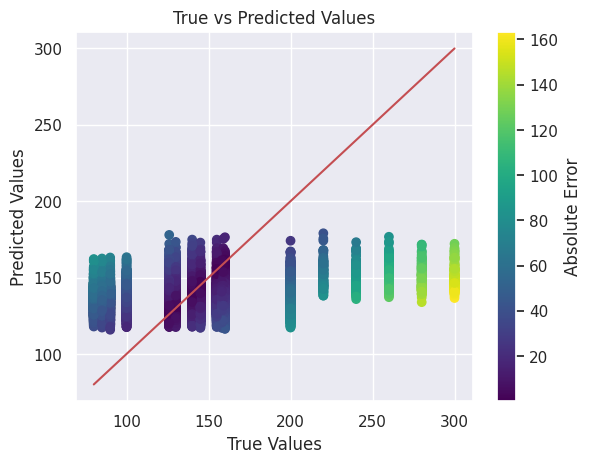

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true is your true target values and y_pred is your predicted target values
errors = np.abs(y_test - y_pred_test)

plt.scatter(y_test, y_pred_test, c=errors, cmap='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.colorbar(label='Absolute Error')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume y_true is your true target values and y_pred is your predicted target values

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error (MAE): 30.7336979787114
Mean Squared Error (MSE): 1582.4863428402837
R2 Score: 0.04362648242651834


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y= y_train, cv= 10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 4.20%
Standard Deviation: 0.50%


In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_test = regressor1.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

[[126.   155.  ]
 [132.21 130.  ]
 [141.86 130.  ]
 ...
 [ 80.   145.  ]
 [200.   158.  ]
 [127.6   85.  ]]


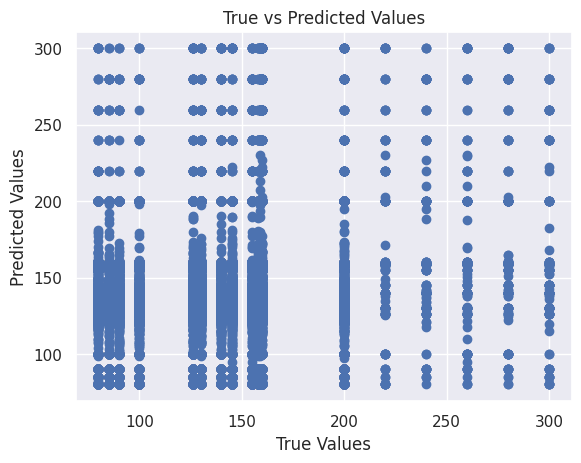

In [ ]:
import matplotlib.pyplot as plt

# Assume y_true is your true target values and y_pred is your predicted target values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

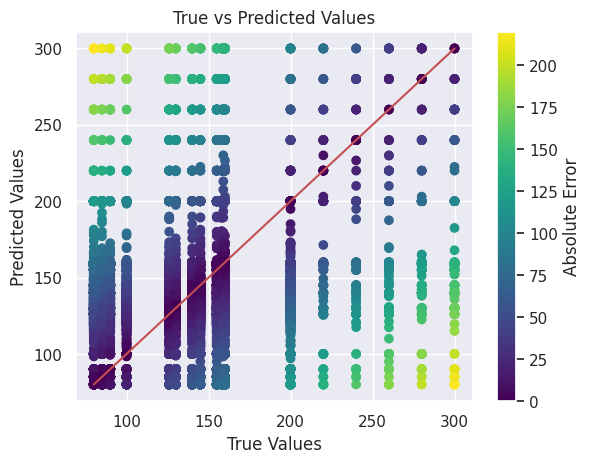

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true is your true target values and y_pred is your predicted target values
errors = np.abs(y_test - y_pred_test)

plt.scatter(y_test, y_pred_test, c=errors, cmap='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.colorbar(label='Absolute Error')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume y_true is your true target values and y_pred is your predicted target values

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 40.440310076196624
Mean Squared Error (MSE): 2830.2352144328115
R2 Score: -0.7104488893909096


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, X = X_train, y= y_train, cv= 10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: -71.54%
Standard Deviation: 3.70%
